In [1]:
# 13.1.fasta_upper / FASTA 파일에 있는 서열을 모두 대문자로 바꾸는 프로그램

from Bio import SeqIO

records = (rec.upper() for rec in SeqIO.parse(r'D:\Danu\Bioinformatics_Algorithon\Biopyhton\Bioinformatics_Biopython_source\Section1\Chap13\13.1.fasta', 'fasta'))
SeqIO.write(records, r'output/13_1_upper.fasta', 'fasta')
# SeqIO.write() 함수는 성공적으로 쓰여진 레코드의 수를 반환

3

In [3]:
# 13.2.fasta_record_counter / FASTA 파일의 각 레코드의 염기서열의 수를 세는 프로그램

input_file = r'D:\Danu\Bioinformatics_Algorithon\Biopyhton\Bioinformatics_Biopython_source\Section1\Chap13\13.2.fasta'

with open(input_file, 'rU') as handle: # 'rU' 다양한 줄 바꿈 문자를 자동으로 처리
    for record in SeqIO.parse(handle, 'fasta'):
        seq = record.seq
        print(record.id)
        print('A :', seq.upper().count('A'))
        print('C :', seq.upper().count('C'))
        print('G :', seq.upper().count('G'))
        print('T :', seq.upper().count('T'))
        print('N :', seq.upper().count('N'))

sample1
A : 9
C : 5
G : 6
T : 8
N : 2
sample2
A : 13
C : 5
G : 4
T : 5
N : 4
sample3
A : 4
C : 8
G : 7
T : 7
N : 4


In [4]:
# 13.3.rev_comp / DNA 서열 "ACATTA"의 상보와 역상보 서열을 구하는 프로그램

from Bio.Seq import Seq

seq = Seq('ACATTA')
comp_seq = seq.complement()
rev_comp_seq = seq.reverse_complement()
print('comp_seq :', comp_seq)
print('rev_comp_seq :', rev_comp_seq)

comp_seq : TGTAAT
rev_comp_seq : TAATGT


In [6]:
# 13.4.read_gb / GanBank 파일 NM_000384.2.gb 파일을 읽어서 id, description, molecule_type, organism 을 출력하는 프로그램

from Bio import SeqIO

gbk = SeqIO.read(r'D:\Danu\Bioinformatics_Algorithon\Biopyhton\Bioinformatics_Biopython_source\Section1\Chap13\NM_000384.2.gb', 'genbank')
print('id :', gbk.id)
print('description :', gbk.description)
print('molecule_type :', gbk.annotations['molecule_type'])
print('orgaism :', gbk.annotations['organism'])

id : NM_000384.2
description : Homo sapiens apolipoprotein B (APOB), mRNA
molecule_type : mRNA
orgaism : Homo sapiens


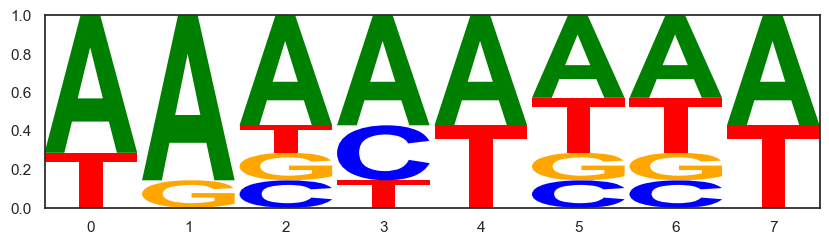

In [23]:
# 13.5.WebLogo / 웹로고를 만드는 프로그램

from Bio.Seq import Seq
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

instances = [
    Seq("AATTAAA"),
    Seq("AAAAAGA"),
    Seq("AAATAGC"),
    Seq("AATCAAC"),
    Seq("AATTTAA"),
    Seq("TATCAGA"),
    Seq("ATATAGC"),
    Seq("ATATTAA"),
]

sequences = [str(seq) for seq in instances]

def compute_frequency(sequence):
    counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for base in sequence:
        if base in counts:
            counts[base] += 1
    total = sum(counts.values())
    return [counts[base] / total for base in 'ACGT']

frequencies = [compute_frequency(seq) for seq in sequences]
data = pd.DataFrame(frequencies, columns=['A', 'C', 'G', 'T'])
logo = logomaker.Logo(data, color_scheme='classic')
logo.draw()
plt.savefig('output/13_5_weblogo.png')

In [37]:
# 13.6.blast / fasta 파일을 BLAST 해보고 어떤 종인지 알아보는 프로그램

from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO

record = SeqIO.read(r'D:\Danu\Bioinformatics_Algorithon\Biopyhton\Bioinformatics_Biopython_source\Section1\Chap13\13.6.fasta', format = 'fasta')
handle = NCBIWWW.qblast('blastn', 'nt', record.format('fasta'))

blast_records = NCBIXML.parse(handle)
E_VALUE_THRESHOLD = 0.05
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < E_VALUE_THRESHOLD:
                print(alignment.title)
                print(alignment.length)
                print(hsp.expect)
                print(hsp.query[0:75])
                print(hsp.match[0:75])
                print(hsp.sbjct[0:75])

gi|61139|emb|X00596.1| Poliovirus type 3 mRNA (vaccine strain Sabin 3 (Leon 12a1b))
7434
3.4535e-106
GTGGGCAAGCACTACTGTTTCGCCGGTGAGGCCGCATAGACTGTTCCCACGGTTGAAAGTGTCCGATCCGTTATC
||||||||||||||||||||| |||||||||||||||||||||||||||||||||||||||||||||||||||||
GTGGGCAAGCACTACTGTTTCCCCGGTGAGGCCGCATAGACTGTTCCCACGGTTGAAAGTGTCCGATCCGTTATC
gi|1046201948|gb|KX162696.1| Poliovirus 2 strain NIE0611195, complete genome
7414
2.48669e-95
GTGGGCAAGCACTACTGTTTCGCCGGTGAGGCCGCATAGACTGTTCCCACGGTTGAAAGTGTCCGATCCGTTATC
||||||||||||||||||||| |||||||||||||||||||||||||||||||||||||||||||||||||||||
GTGGGCAAGCACTACTGTTTCCCCGGTGAGGCCGCATAGACTGTTCCCACGGTTGAAAGTGTCCGATCCGTTATC
gi|429559038|gb|JX274985.1| Human poliovirus 2 strain NIE0611195, complete genome
7434
2.48669e-95
GTGGGCAAGCACTACTGTTTCGCCGGTGAGGCCGCATAGACTGTTCCCACGGTTGAAAGTGTCCGATCCGTTATC
||||||||||||||||||||| |||||||||||||||||||||||||||||||||||||||||||||||||||||
GTGGGCAAGCACTACTGTTTCCCCGGTGAGGCCGCATAGACTGTTCCCACGGTTGAAAGTGTCCGATCCGTTATC
gi|1402110095|gb|MF541

In [2]:
# 13.7.efetch / Entrez를 사용하여 NCBI의 nucleotide 데이터 베이스의 NC_001498.1의 Locus, definition,strand, molecular type, length, jourlal을 출력하는 프로그램

from Bio import Entrez

Entrez.email = 'qnfrdms2003@gmail.com'
handle = Entrez.efetch(db = 'nucleotide', id = 'NC_001498.1', rettype = 'gb', retmode = 'xml')
records = Entrez.read(handle)
for record in records:
    print('Locus :', record['GBSeq_locus'])
    print('Definition :', record['GBSeq_definition'])
    print('Strand, Molecular type :', record['GBSeq_strandedness'], record['GBSeq_moltype'])
    print('Length :', record['GBSeq_length'], 'bp')
    print('Journal :', len(record['GBSeq_references']), 'journals')

Locus : NC_001498
Definition : Measles virus, complete genome
Strand, Molecular type : single cRNA
Length : 15894 bp
Journal : 8 journals


In [3]:
# 13.8.ExPASy / SwissProt accession ID PO4637의 gene_name, organism, sequence를 출력하는 프로그램

from Bio import ExPASy
from Bio import SwissProt

accession = 'P04637'

handle = ExPASy.get_sprot_raw(accession)
record = SwissProt.read(handle)
print('gene_name :', record.gene_name)
print('organism :', record.organism)
print('sequence :', record.sequence)

gene_name : [{'Name': 'TP53', 'Synonyms': ['P53']}]
organism : Homo sapiens (Human).
sequence : MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD


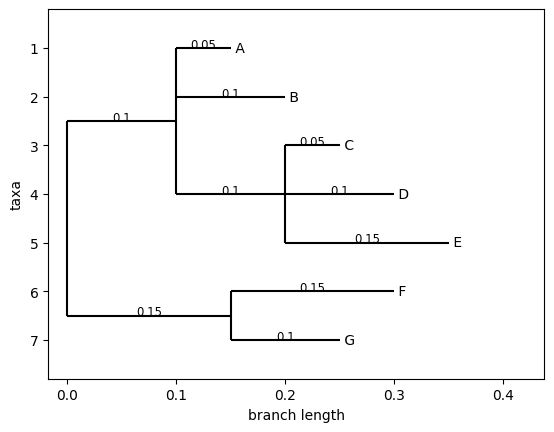

In [4]:
# 13.9.tree / 계통수 그리기

from Bio import Phylo

tree = Phylo.read(r'D:\Danu\Bioinformatics_Algorithon\Biopyhton\Bioinformatics_Biopython_source\Section1\Chap13\13.9.nwk', 'newick')
Phylo.draw(tree, branch_labels = lambda c: c.branch_length)

In [16]:
# 13.10.KEGG / KEGG pathway에서 Hepatits와 관련 있는 pathway와 유전자를 출력하는 프로그램

from Bio.KEGG import REST
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

human_pathways = urllib.request.urlopen('https://rest.kegg.jp/list/pathway/hsa').read()

ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

human_pathways = human_pathways.decode()  # 바이트를 문자열로 변환

hepatitis_pathways = []
for line in human_pathways.rstrip().split('\n'):
    entry, description = line.split('\t')
    if 'hepatitis' in description.lower():
        hepatitis_pathways.append(entry)
        print(entry, description)
print(hepatitis_pathways)

hepatitis_genes = []
for pathway in hepatitis_pathways:
    pathway_file = REST.kegg_get(pathway).read()

    current_section = None
    for line in pathway_file.rstrip().split('\n'):
        section = line[:12].strip()
        if not section == '':
            current_section = section

            if current_section == 'GENE':
                gene_identifiers, gene_description = line[12:].split('; ')
                gene_id, gene_symbol = gene_identifiers.split()

                if not gene_symbol in hepatitis_genes:
                    hepatitis_genes.append(gene_symbol)

print('There are %d hepatitis pathways and %d hepatitis genes. The genes are:' % (len(hepatitis_pathways), len(hepatitis_genes)))
print(', '.join(hepatitis_genes))

hsa05161 Hepatitis B - Homo sapiens (human)
hsa05160 Hepatitis C - Homo sapiens (human)
['hsa05161', 'hsa05160']
There are 2 hepatitis pathways and 2 hepatitis genes. The genes are:
HSPG2, LDLR
